# 06.01 - CLUSTERING

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
!rm -rf Proyecto-I.A

In [ ]:
!git clone https://github.com/doviedob/Proyecto-I.A.git

Cloning into 'Proyecto-I.A'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 39 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), 5.18 MiB | 3.95 MiB/s, done.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from local.lib import mlutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML, Image

%matplotlib inline

## Referencias generales

- [Cluster Analysis on Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
- [Cluster Analysis, Basic concepts and algorithms](https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf)


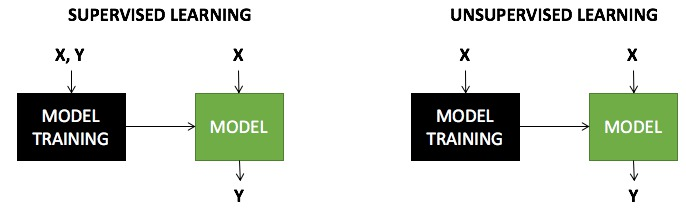

In [ ]:
Image(filename='local/imgs/learning.jpg', width=600)

**Qué es clustering?**

- **Objetivo**: agrupar objetos físicos o obstractos en clases de objetos **similares**
- Es una tarea **NO SUPERVISADA** $\rightarrow$ no sabemos a priorí cómo clasificar nuestros objetos
- Es una tarea **NO COMPLETAMENTE DEFINIDA** $\rightarrow$ ¿Cómo cuantificamos el desempeño de un resultado de clustering?


- ¿Qué definición de **similitud** establecemos?

**Ejemplos de aplicaciones de clustering**

- Taxonomías en biología, agrupaciones por similitud biológica, o incluso genética (big data!!)
- Páginas similares para estructurar resultados de búsquedas (p.ej. La búsqueda de "película" podría devolver resultados agrupados por descripciones similares.
- Segmentación de clientes o usuarios por un criterio de similitud definido.


## Intuición

¿Qué grupos harías con los siguientes datos?,  ¿Cómo sería el proceso?

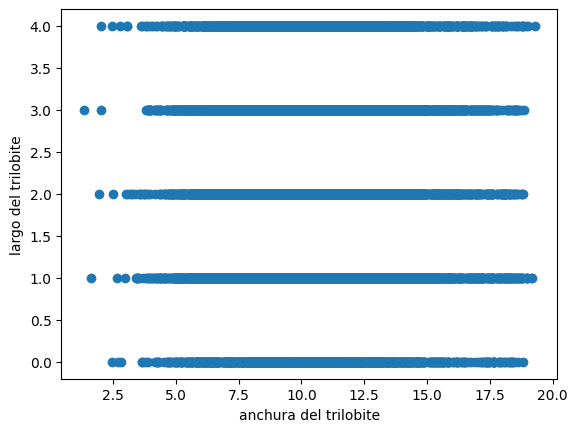

In [ ]:
dC = pd.read_csv('Proyecto-I.A/train_listo.csv')
X=dC.iloc[:,2:]# Datos de variables estimadores
X=X.values
X.shape 
y=dC.iloc[:,1] #Salida es variable objetivo
y=y.values
plt.scatter(X[:,0], X[:,1])
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite");

pseudo código

    input: 
        X: datos
        k: número de clusters deseados
        
    algoritmo:
        1. selecciona k centroides aleatoriamente
        2. repite hasta que los k centroides no cambien:
        3.     establece k clusters asignado cada dato al centroide más cercano
        4.     recalcula el centroide de cada cluster como el promedio de los datos

## Métodos basados en centroides -  KMeans


In [ ]:
X.shape

(10000, 48)

In [ ]:
X[:10]

array([[ 8.92550000e+00,  4.00000000e+00,  1.19081000e+01,
         5.09300000e+00,  1.07566382e+01, -9.28340000e+00,
         5.11870000e+00,  1.86266000e+01, -4.92000000e+00,
         5.74700000e+00,  2.92520000e+00, -9.05985821e+00,
         1.40137000e+01,  5.74500000e-01,  8.79890000e+00,
         1.45691000e+01,  5.74870000e+00, -7.23930000e+00,
         4.28400000e+00,  3.07133000e+01,  1.05350000e+01,
         4.00000000e+00,  2.57910000e+00,  2.47160000e+00,
         1.43831000e+01,  1.34325000e+01, -5.14880000e+00,
         4.00000000e+00,  4.93060000e+00,  5.99650000e+00,
        -3.08500000e-01,  1.29041000e+01, -3.87660000e+00,
         1.68911000e+01,  1.21780868e+01,  1.00000000e+00,
         6.76400000e-01,  7.88710000e+00,  4.66670000e+00,
         3.87430000e+00, -5.23870000e+00,  7.37460000e+00,
         1.15767000e+01,  1.20446000e+01,  1.16418000e+01,
        -7.01700000e+00,  5.92260000e+00, -1.42136000e+01],
       [ 1.15006000e+01,  2.00000000e+00,  1.38588000e+

In [ ]:
n_clusters = 2

km = KMeans(n_clusters=n_clusters)
km.fit(X)
y = km.predict(X)
y.shape

(10000,)

In [ ]:
pd.Series(y).value_counts()

1    5071
0    4929
dtype: int64

In [ ]:
km.cluster_centers_

array([[ 10.70656444,   2.06474528,  10.70884554,   6.79587782,
         11.13852805,  -5.08402066,   5.3858219 ,  16.61151559,
          0.29301666,   7.58686885,   0.30783335,  -3.24455595,
         14.02152192,   8.44125295,   7.45155259,  14.56694802,
          9.32929377,  -5.7908825 ,  15.42705553,  12.48173438,
         13.27494948,   2.23056627,   4.30462695,   3.02223726,
         10.63073651,  13.67204727,  -4.17360824,   2.06515121,
          5.55169598,   5.11091419,  -7.55274461,  10.35452839,
         -0.52446172,  14.78976351,  11.40555424,   1.92612137,
          2.16569651,   5.90066757,  10.6622373 ,   0.63931283,
         -6.88683927,   9.45371823,  11.20952553,  11.57708027,
          9.02217077,   4.99375293,  11.3257317 , -12.44558255],
       [ 10.63984406,   2.05479992,  10.71064796,   6.79766935,
         11.1421848 ,  -4.98895555,   5.41997031,  16.63078445,
          0.27556318,   7.57016166,   0.35003799,  -3.28297486,
         14.02589846,   8.46036444,   7

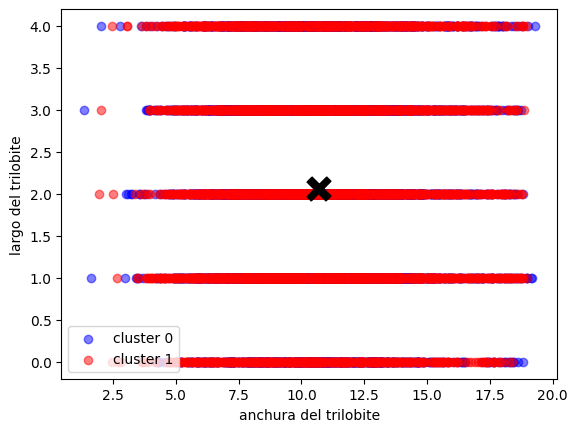

In [ ]:
def plot_clusters(X,y):
    n_clusters = len(np.unique(y))
    cmap = plt.cm.bwr if n_clusters==2 else plt.cm.plasma
    cmap((y*255./(n_clusters-1)).astype(int))
    for i in np.unique(y):
        col = cmap((i*255./(n_clusters-1)).astype(int))
        Xr = X[y==i]
        plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
    plt.legend()    
    plt.xlabel("anchura del trilobite")
    plt.ylabel("largo del trilobite");



plot_clusters(X,y)

observa cómo KMeans agrupa datos en 2D con diferentes números de clusters

100% (8 of 8) |##########################| Elapsed Time: 0:00:25 Time:  0:00:25


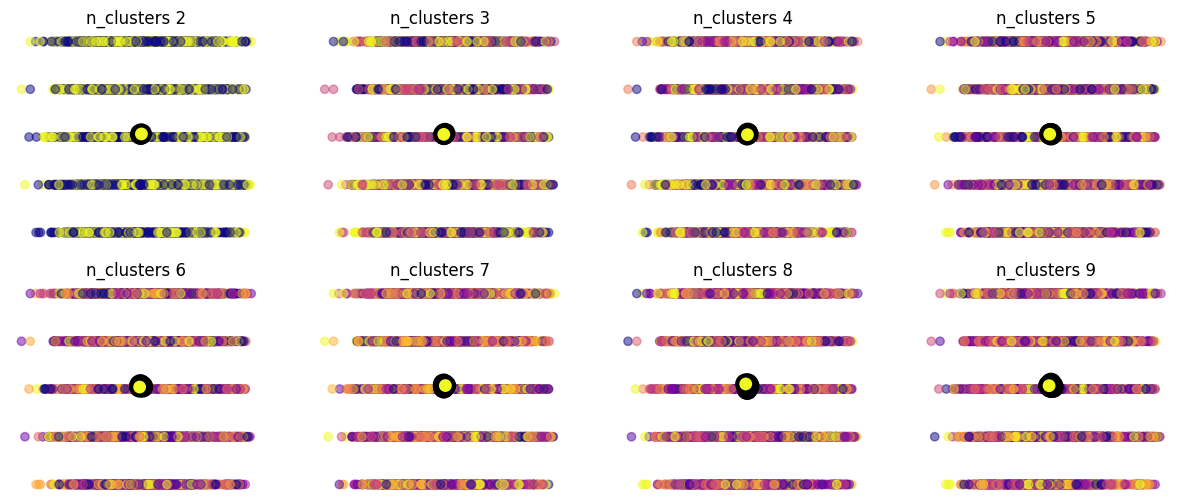

In [ ]:
mlutils.experiment_number_of_clusters(X, KMeans(), show_metric=False)

### Cómo seleccionar el número de clusters? Consulta <a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Silhouette Coefficient</a>

In [ ]:
def silhouette_analysis(X):
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(19, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for %s clustering on sample data "
                      "with n_clusters = %d, score = %.3f" % (clusterer.__class__.__name__, n_clusters,silhouette_avg)),
                     fontsize=14, fontweight='bold')

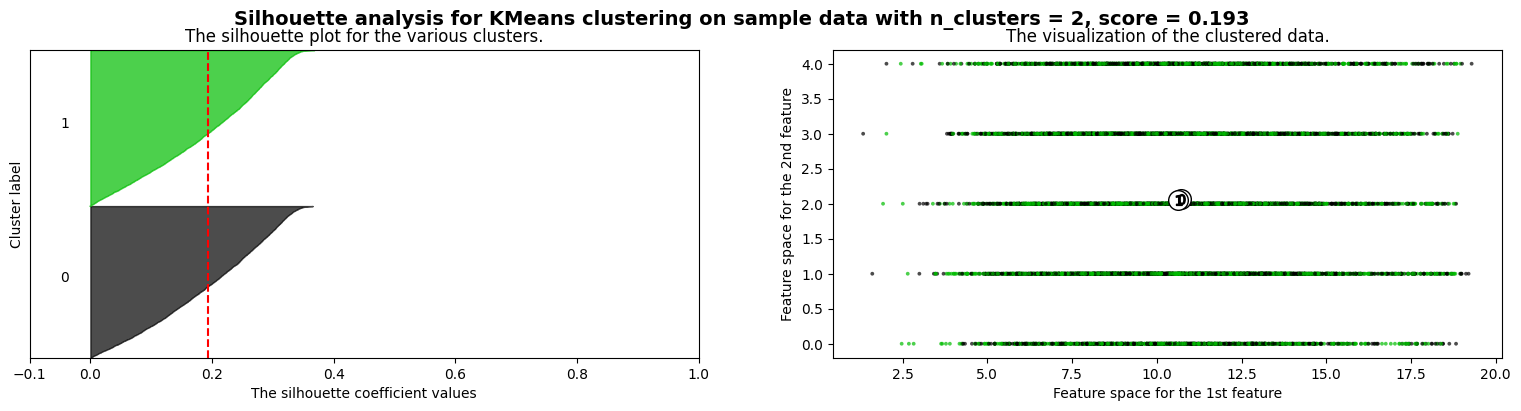

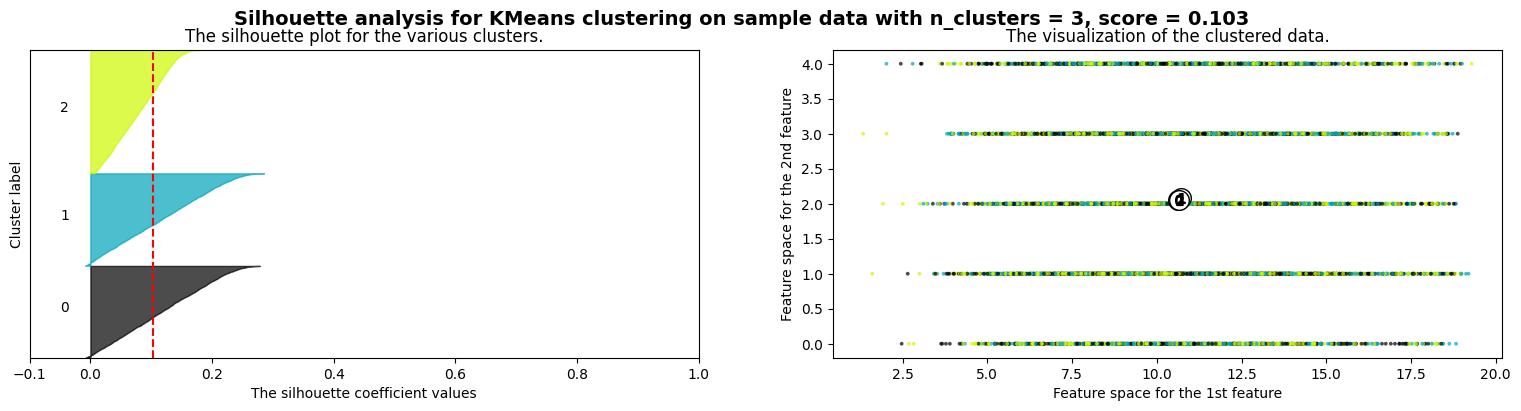

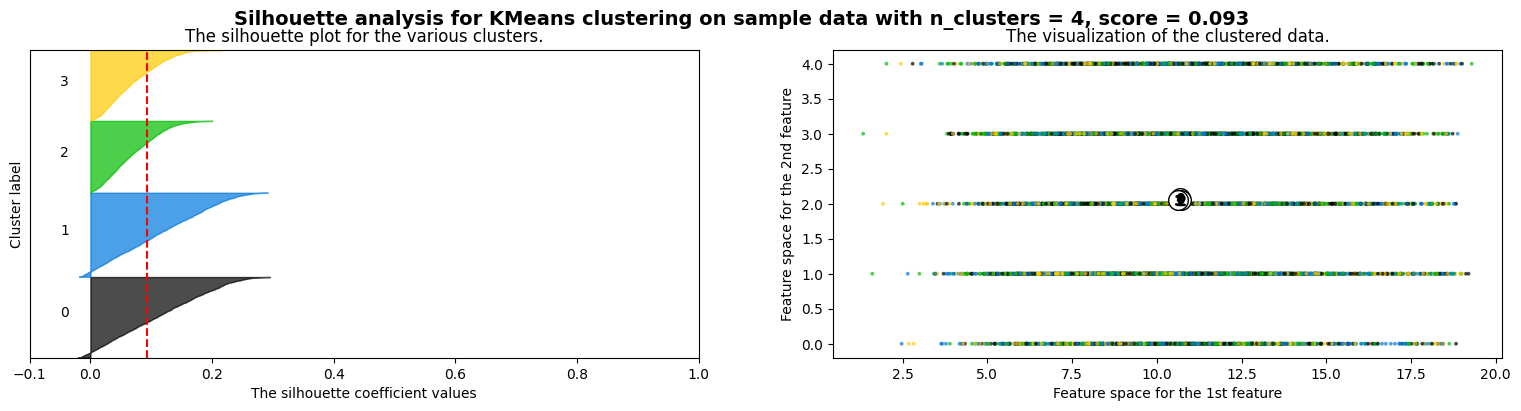

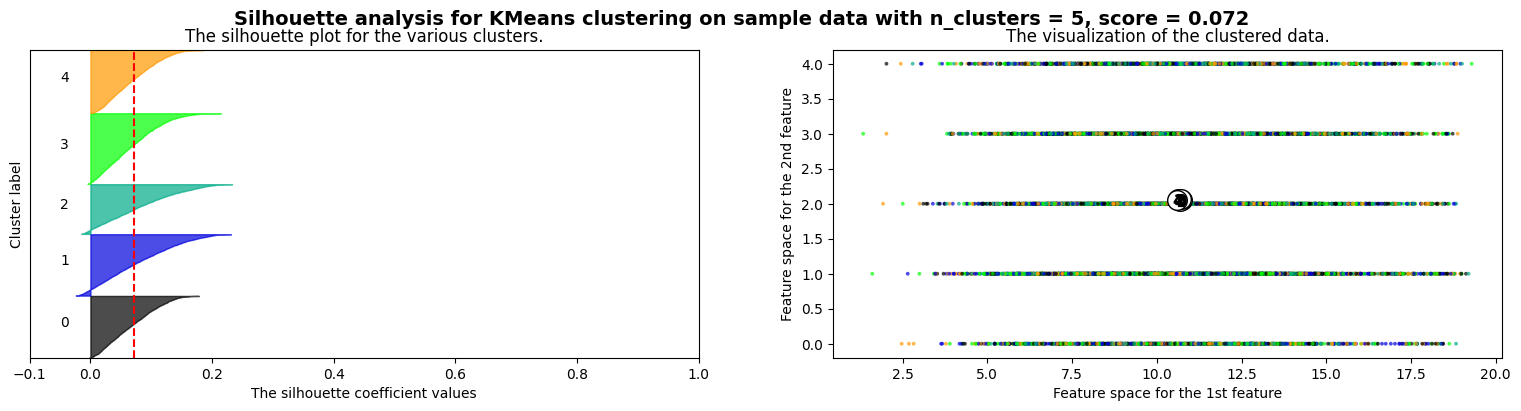

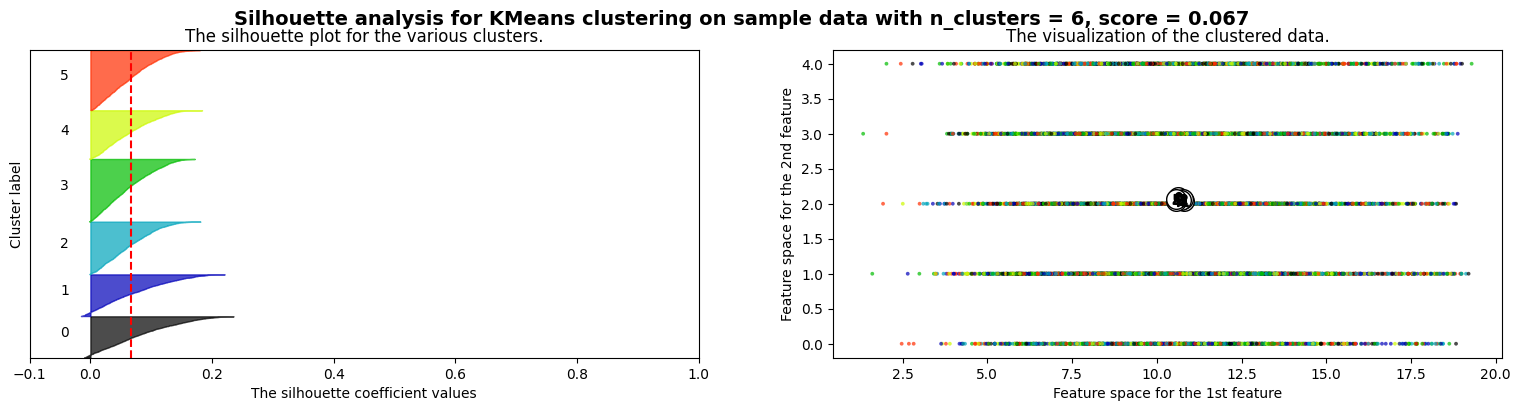

In [ ]:
silhouette_analysis(X)

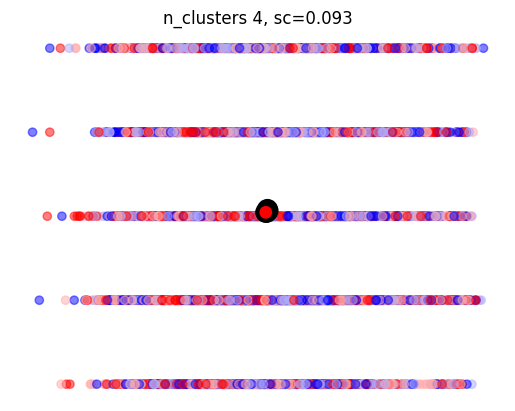

In [ ]:
mlutils.plot_cluster_predictions(KMeans(), X, n_clusters=4,cmap=plt.cm.bwr, show_metric=True)